In [1]:
import partial_fourier_recon
import scipy.io
ksp = scipy.io.loadmat(r'D:\我的坚果云\code\utility\ksp0201_X160Y256Passes1.mat')['ksp']

In [2]:
kspFull_kxkycz, kspZpad_kxkycz = partial_fourier_recon.pf_recon_pocs_ms2d(ksp, 10);

auto detect peak at 26; full Nx is 268
processing slice 5/48
processing slice 10/48
processing slice 15/48
processing slice 20/48
processing slice 25/48
processing slice 30/48
processing slice 35/48
processing slice 40/48
processing slice 45/48
done


In [3]:
import numpy as np
import matplotlib.pyplot as plt
def ifftnd(kspace, axes=[-1]):
    from scipy.fftpack import fftshift, ifftshift, ifftn
    if axes is None:
        axes = range(kspace.ndim)
    img = fftshift(ifftn(ifftshift(kspace, axes=axes), axes=axes), axes=axes)
    img *= np.sqrt(np.prod(np.take(img.shape, axes)))
    return img


def fftnd(img, axes=[-1]):
    from scipy.fftpack import fftshift, ifftshift, fftn
    if axes is None:
        axes = range(img.ndim)
    kspace = fftshift(fftn(ifftshift(img, axes=axes), axes=axes), axes=axes)
    kspace /= np.sqrt(np.prod(np.take(kspace.shape, axes)))
    return kspace

def rms_comb(sig, axis=1):
    return np.sqrt(np.sum(abs(sig)**2, axis))

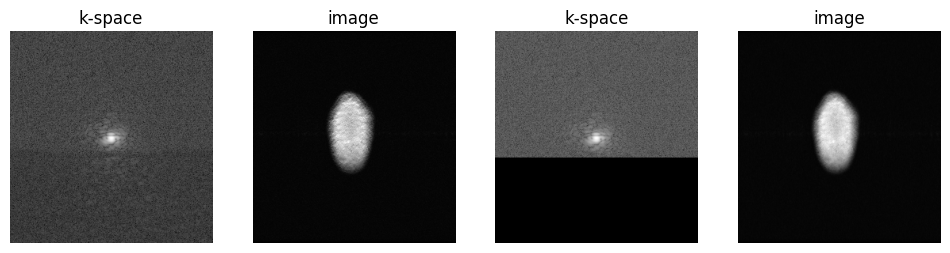

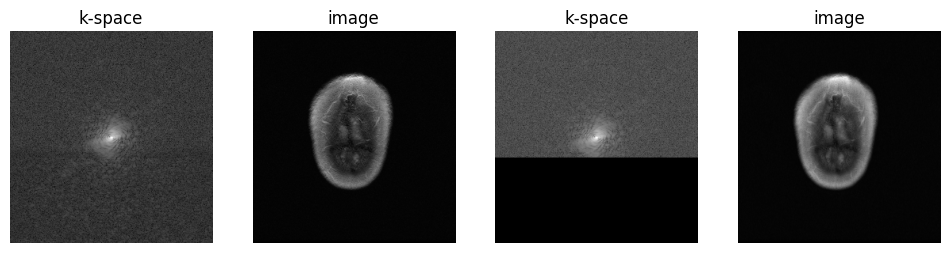

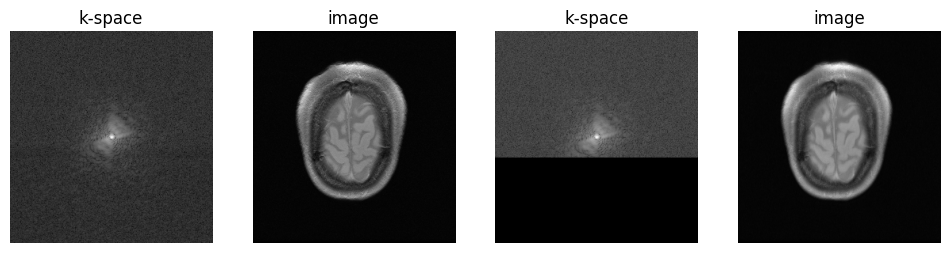

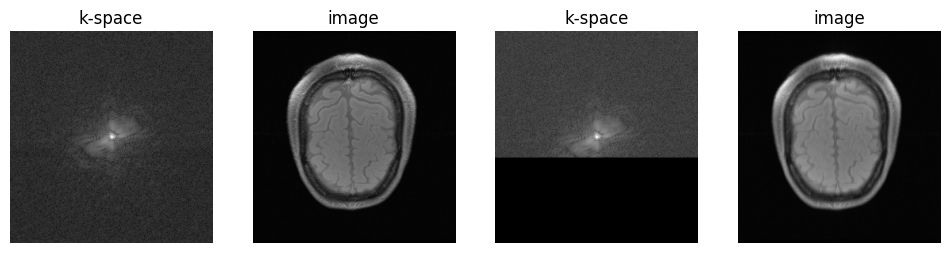

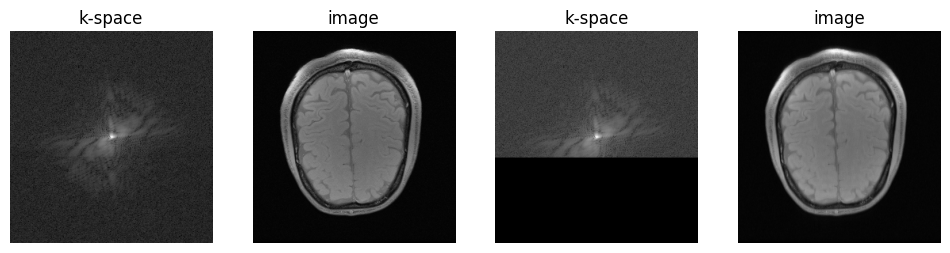

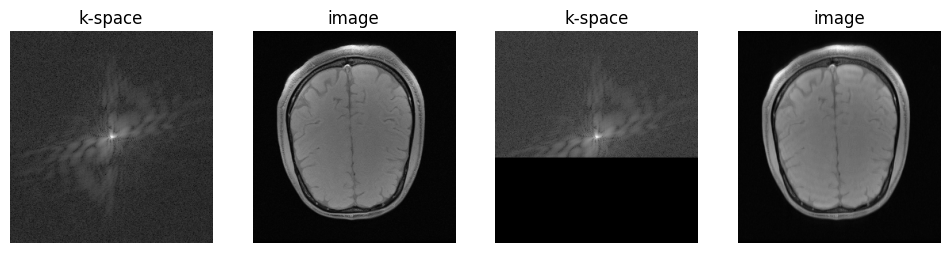

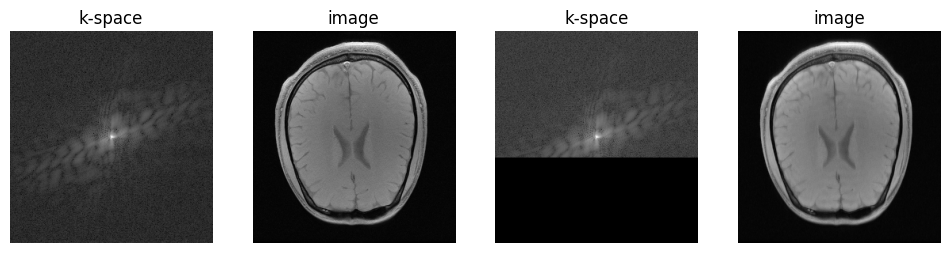

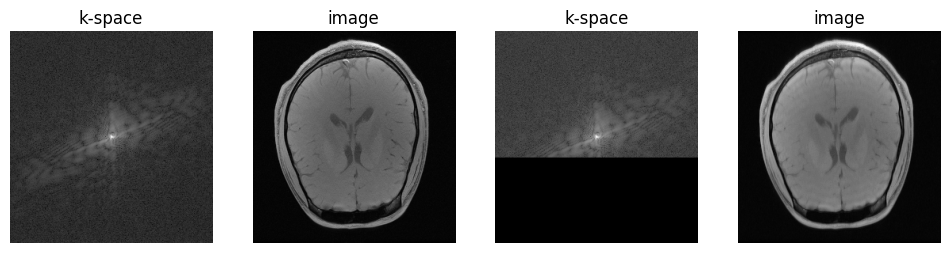

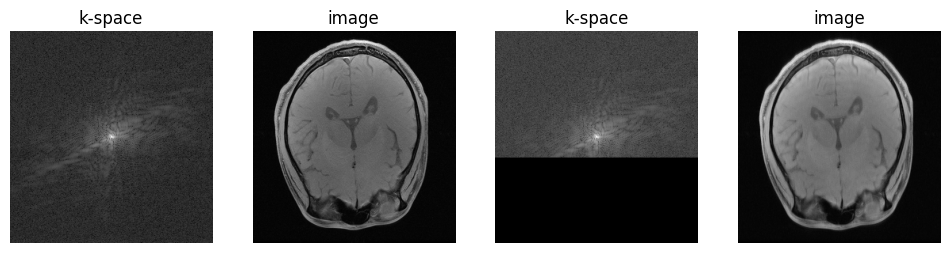

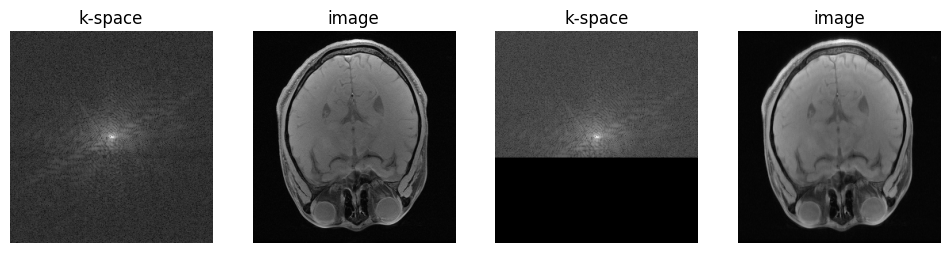

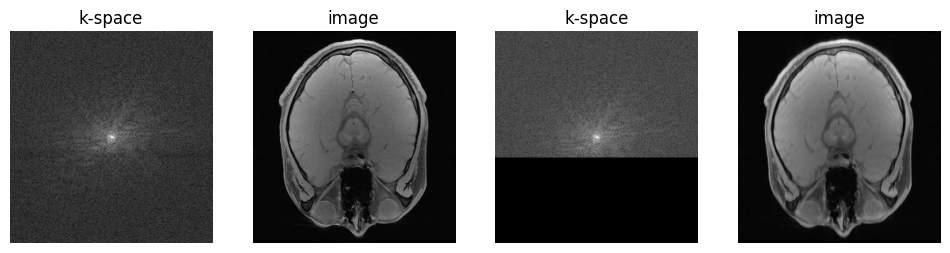

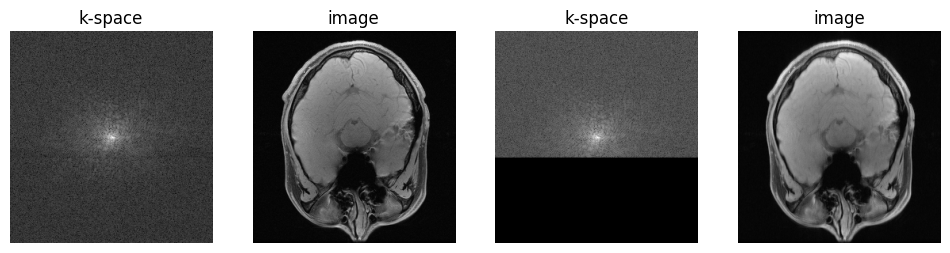

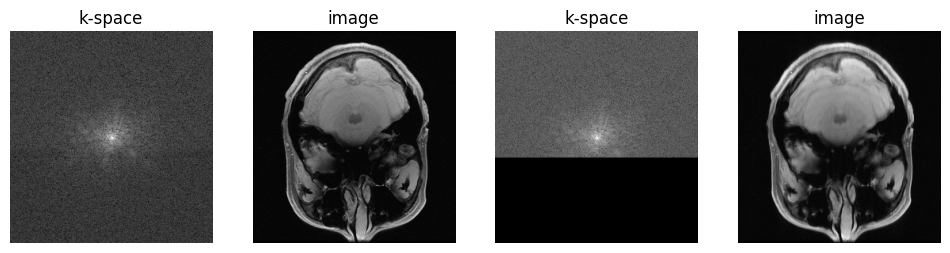

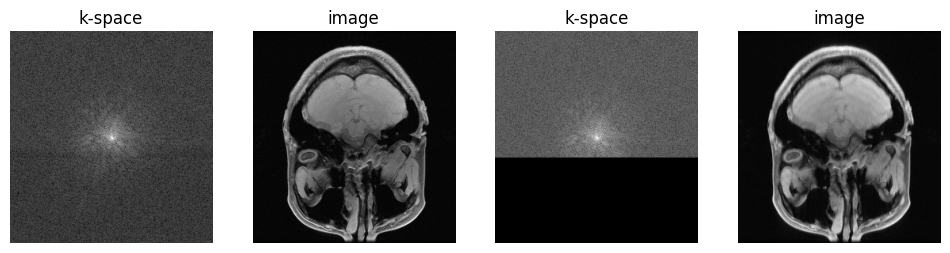

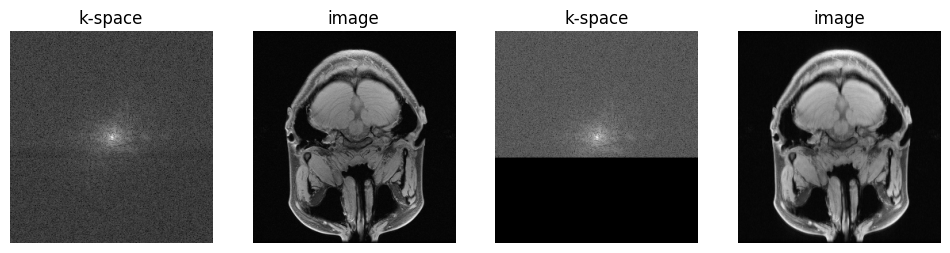

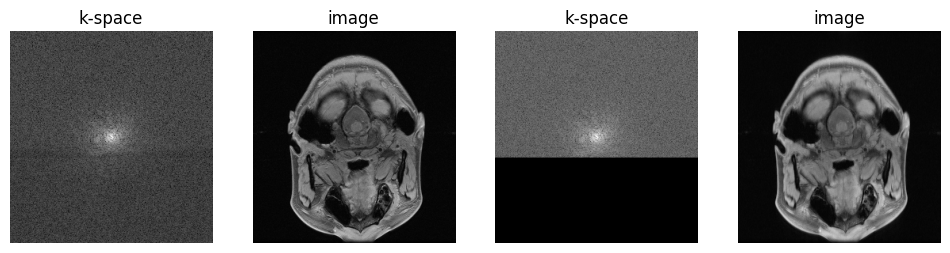

In [4]:
for iSlice in range(0, 48, 3):
    data = kspFull_kxkycz[:,:,:,iSlice]
    plt.figure(figsize=[12,8])
    plt.subplot(141)
    plt.title('k-space')
    plt.imshow(abs(data[:,:,0])**0.2, cmap='gray', origin='lower')
    plt.axis('off')

    image = ifftnd(data, [0,1])
    image = rms_comb(image, 2)
    plt.subplot(142)
    plt.title('image')
    plt.imshow(np.fft.fftshift(abs(image),1), cmap='gray', origin='lower')
    plt.axis('off')

    data2 = kspZpad_kxkycz[:,:,:,iSlice]
    plt.subplot(143)
    plt.title('k-space')
    plt.imshow(abs(data2[:,:,0])**0.2, cmap='gray', origin='lower')
    plt.axis('off')
    
    image2 = ifftnd(kspZpad_kxkycz[:,:,:,iSlice], [0,1])
    image2 = rms_comb(image2, 2)
    plt.subplot(144)
    plt.title('image')
    plt.imshow(np.fft.fftshift(abs(image2),1), cmap='gray', origin='lower')
    plt.axis('off')
    plt.show()